In [1]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html

import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
data_frame = pd.read_csv("T40.1_nationwide.txt",delimiter="\t")


We replace "Unreliable" by NaN.

In [3]:
data_frame=data_frame.replace("Unreliable",np.nan)

In [4]:
data_frame[data_frame["Gender"] == "Female"]

,Notes,Year,Year Code,Gender,Gender Code,Deaths,Population,Crude Rate,Unnamed: 8
0,NaN,2013.0,2013.0,Female,F,1733.0,160477237.0,1.1,NaN
3,NaN,2014.0,2014.0,Female,F,2414.0,161920569.0,1.5,NaN
6,NaN,2015.0,2015.0,Female,F,3108.0,163189523.0,1.9,NaN
9,NaN,2016.0,2016.0,Female,F,3717.0,164048590.0,2.3,NaN
12,NaN,2017.0,2017.0,Female,F,3886.0,165311059.0,2.4,NaN
15,NaN,2018.0,2018.0,Female,F,3705.0,166038755.0,2.2,-8.333333
18,NaN,2019.0,2019.0,Female,F,3520.0,166582199.0,2.1,-4.545455
21,NaN,2020.0,2020.0,Female,F,3284.0,167227921.0,2.0,-4.761905


In [5]:
CF2 = data_frame[(data_frame["Gender"] == "Female") & 
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2 = data_frame[(data_frame["Gender"] == "Male") & 
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float)
CF = data_frame[(data_frame["Gender"] == "Female")] [["Year", "Crude Rate"]].astype(float) 
CM = data_frame[(data_frame["Gender"] == "Male")][["Year", "Crude Rate"]].astype(float)
CF2_covid = data_frame[(data_frame["Gender"] == "Female") & 
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2_covid = data_frame[(data_frame["Gender"] == "Male") & 
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)

In [11]:
x1=CF2["Year"]
y1=CF2["Crude Rate"]
x1c=CF["Year"]

x2=CM2["Year"]
y2=CM2["Crude Rate"]
x2c=CM["Year"]

In [12]:
xr=CM2["Year"]
yr=CM2["Crude Rate"].div(CF2["Crude Rate"].values)

In [15]:
coeffF = np.polyfit(x1, y1, 2)
yfitF = np.polyval(coeffF,x1)
resF = np.sum((y1  - yfitF)**2)
coeffM = np.polyfit(x2, y2, 2)
yfitM = np.polyval(coeffM,x2)
resM = np.sum((y2  - yfitM)**2)

#stdF = np.sqrt(resF/5)
#stdM = np.sqrt(resM/5)

stdF = np.sqrt(resF/(len(y1)-3))
stdM = np.sqrt(resM/(len(y2)-3))

gdf = pd.DataFrame({"value": [2013, 2013.5, 2014, 2014.5, 2015, 2015.5, 2016, 2016.5, 2017, 
                              2017.5, 2018, 2018.5, 2019, 2019.5, 2020]})

percent off female =  21    13.821138
Name: Crude Rate, dtype: float64
percent off male =  22    9.768638
Name: Crude Rate, dtype: float64


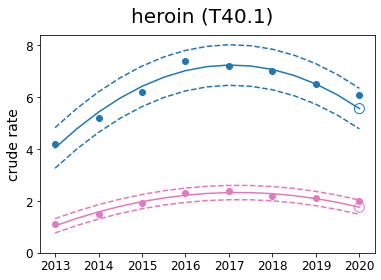

In [16]:
plt.plot(gdf, np.polyval(coeffF,gdf), color='tab:pink')
plt.scatter(x1,y1, color='tab:pink')
plt.scatter(2020.0, CF2_covid["Crude Rate"], color='tab:pink')
plt.scatter(2020.0, np.polyval(coeffF,2020), s=100, edgecolors='tab:pink', facecolors='none')

plt.plot(gdf, np.polyval(coeffM,gdf), color='tab:blue')
plt.scatter(x2,y2, color='tab:blue')
plt.scatter(2020.0, CM2_covid["Crude Rate"],color='tab:blue')
plt.scatter(2020.0, np.polyval(coeffM,2020), s=100, edgecolors='tab:blue', facecolors='none')

plt.plot(gdf, np.polyval(coeffF,gdf)+3*stdF, color='tab:pink', linestyle='dashed')
plt.plot(gdf, np.polyval(coeffF,gdf)-3*stdF, color='tab:pink', linestyle='dashed')
plt.plot(gdf, np.polyval(coeffM,gdf)+3*stdM, color='tab:blue', linestyle='dashed')
plt.plot(gdf, np.polyval(coeffM,gdf)-3*stdM, color='tab:blue', linestyle='dashed')

print('percent off female = ',(CF2_covid["Crude Rate"]/np.polyval(coeffF,2020)-1)*100)
print('percent off male = ',(CM2_covid["Crude Rate"]/np.polyval(coeffM,2020)-1)*100)
plt.suptitle('heroin (T40.1)', fontsize=20)
#plt.xlabel("year", fontsize =14)
plt.ylabel("crude rate", fontsize =14)
plt.yticks(np.arange(0, 8.3, 2.0))
#plt.legend(["females", "males"], frameon=False, fontsize = 14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)

plt.savefig('AttemptT40.1_R.svg')